<a href="https://colab.research.google.com/github/sinch2121/Connecting-vehicle-analysis-Data-analytics/blob/main/connectedvehicleanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 0.9864333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      9809
           1       1.00      0.99      0.99     10024
           2       0.98      0.98      0.98     10167

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



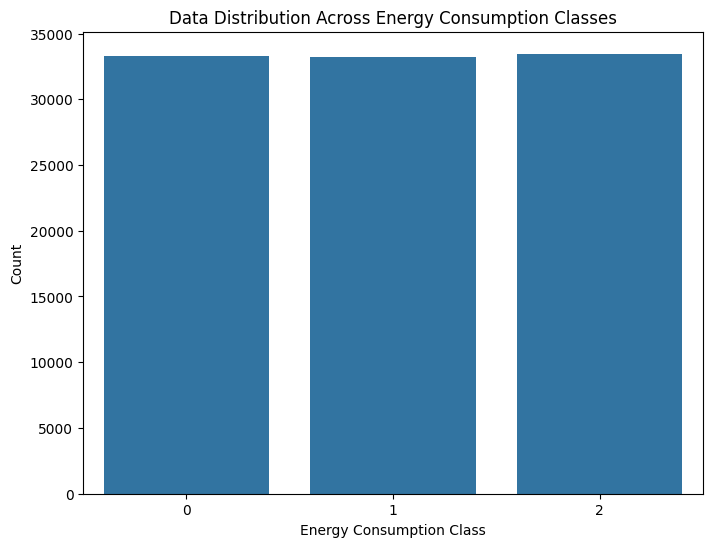

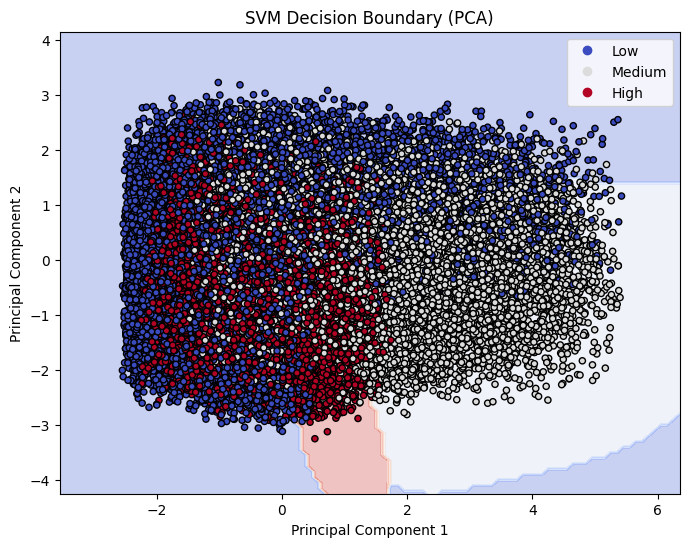

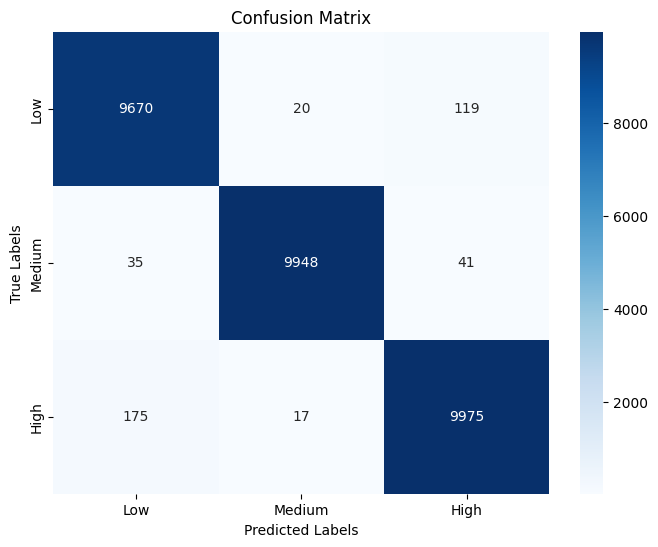

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/vehicle_energy_consumption_dataset (1).csv")

# Encode categorical target variable
data['Energy_Consumption'] = data['Energy_Consumption'].astype('category').cat.codes

# Split data into features and target
X = data.drop(columns=['Energy_Consumption'])
y = data['Energy_Consumption']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Data distribution across energy consumption classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Energy_Consumption', data=data)
plt.title("Data Distribution Across Energy Consumption Classes")
plt.xlabel("Energy Consumption Class")
plt.ylabel("Count")
plt.show()

# Plot 2: PCA for 2D visualization of decision boundaries (only for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

# Train SVM on PCA-transformed data for visualization purposes
svm_model_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Energy_Consumption'], cmap='coolwarm', edgecolors='k', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'Medium', 'High'])
plt.title("SVM Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot 3: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Model Accuracy: 0.9999333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9809
           1       1.00      1.00      1.00     10024
           2       1.00      1.00      1.00     10167

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



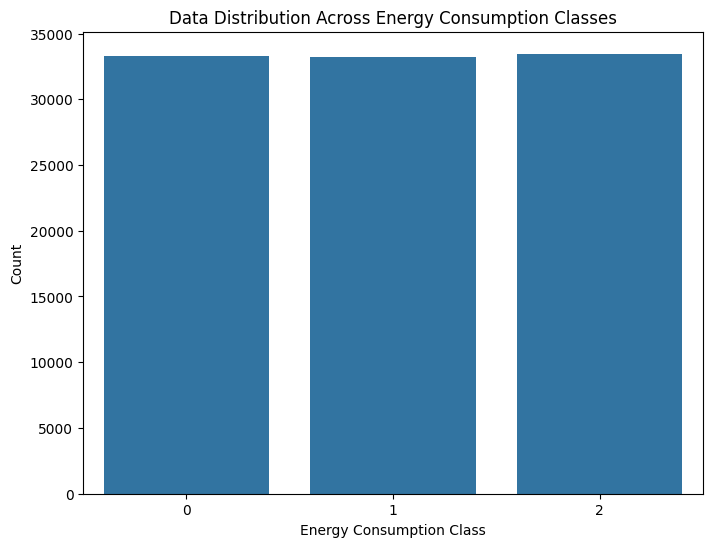

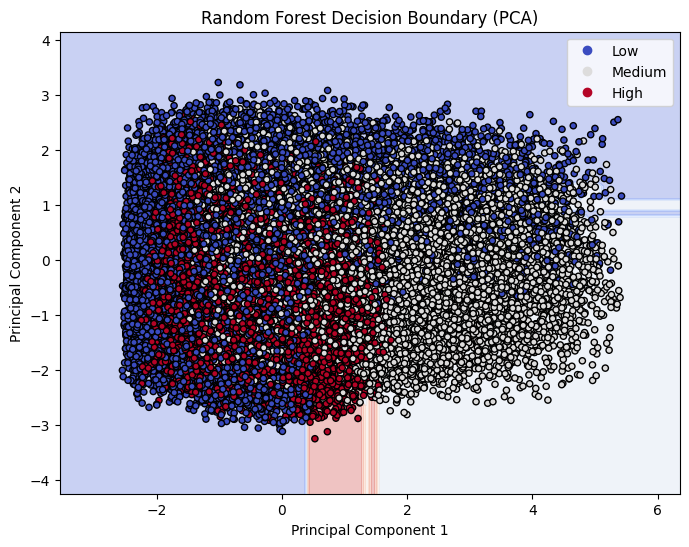

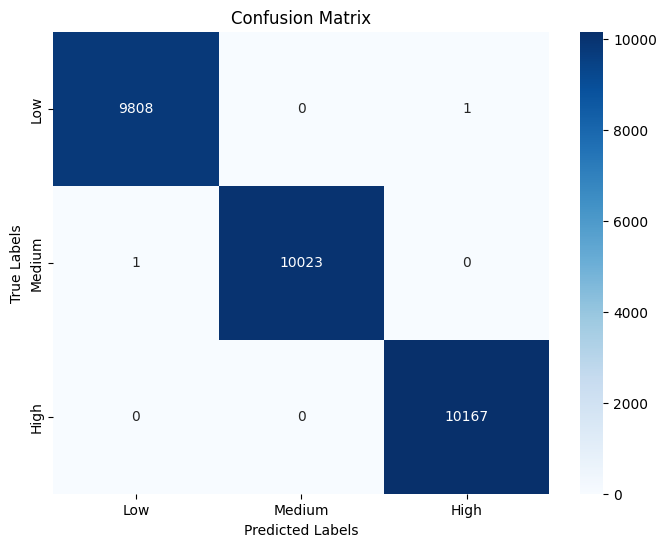

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/vehicle_energy_consumption_dataset (1).csv")

# Encode categorical target variable
data['Energy_Consumption'] = data['Energy_Consumption'].astype('category').cat.codes

# Split data into features and target
X = data.drop(columns=['Energy_Consumption'])
y = data['Energy_Consumption']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Data distribution across energy consumption classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Energy_Consumption', data=data)
plt.title("Data Distribution Across Energy Consumption Classes")
plt.xlabel("Energy Consumption Class")
plt.ylabel("Count")
plt.show()

# Plot 2: PCA for 2D visualization of decision boundaries (only for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

# Train Random Forest on PCA-transformed data for visualization purposes
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = rf_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Energy_Consumption'], cmap='coolwarm', edgecolors='k', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'Medium', 'High'])
plt.title("Random Forest Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot 3: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Model Accuracy: 0.9877

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3273
           1       1.00      0.99      1.00      3307
           2       0.99      0.98      0.98      3420

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



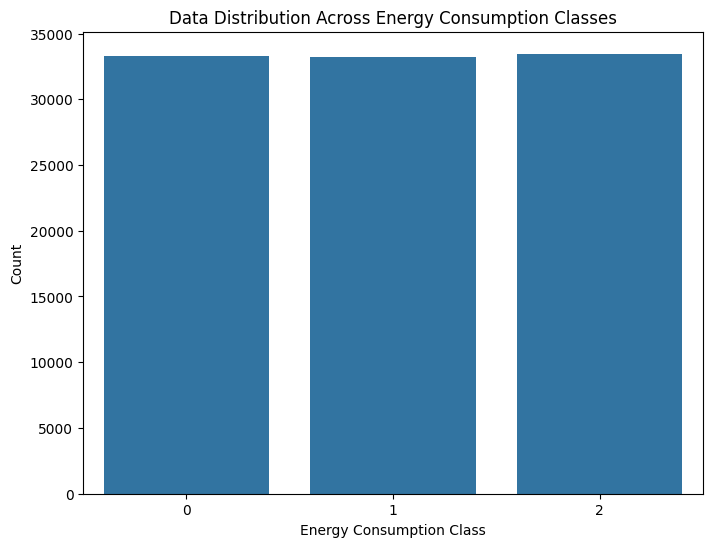

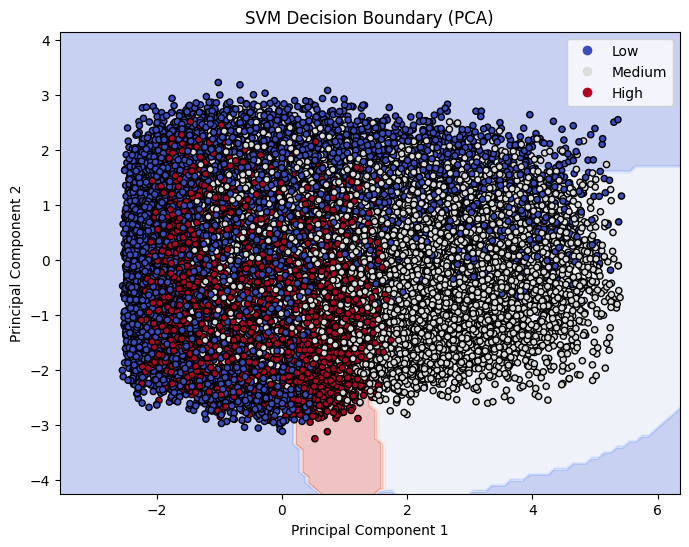

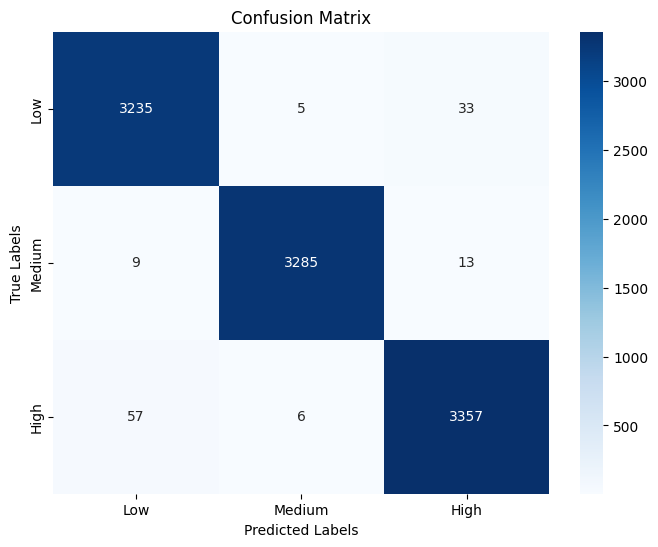

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/vehicle_energy_consumption_dataset (1).csv")

# Encode categorical target variable
data['Energy_Consumption'] = data['Energy_Consumption'].astype('category').cat.codes

# Split data into features and target
X = data.drop(columns=['Energy_Consumption'])
y = data['Energy_Consumption']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Data distribution across energy consumption classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Energy_Consumption', data=data)
plt.title("Data Distribution Across Energy Consumption Classes")
plt.xlabel("Energy Consumption Class")
plt.ylabel("Count")
plt.show()

# Plot 2: PCA for 2D visualization of decision boundaries (only for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.1, random_state=42)

# Train SVM on PCA-transformed data for visualization purposes
svm_model_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Energy_Consumption'], cmap='coolwarm', edgecolors='k', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'Medium', 'High'])
plt.title("SVM Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot 3: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3273
           1       1.00      1.00      1.00      3307
           2       1.00      1.00      1.00      3420

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



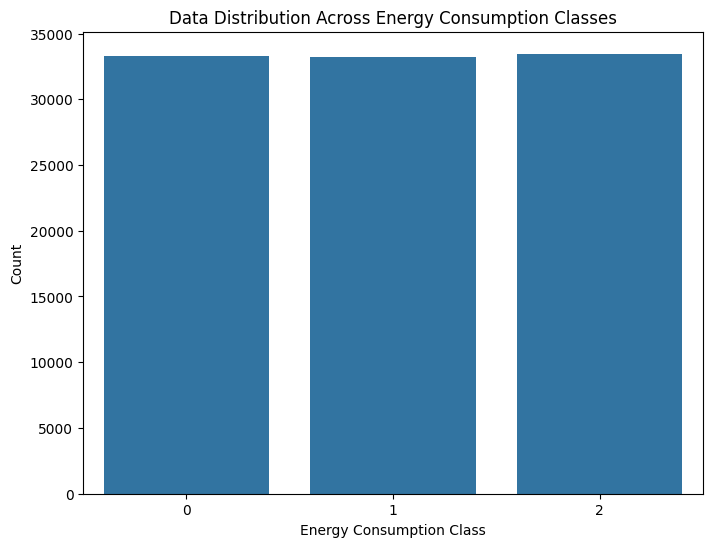

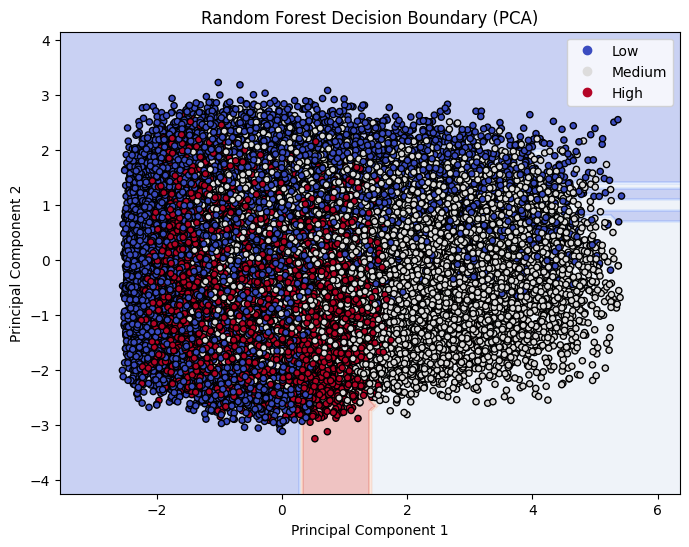

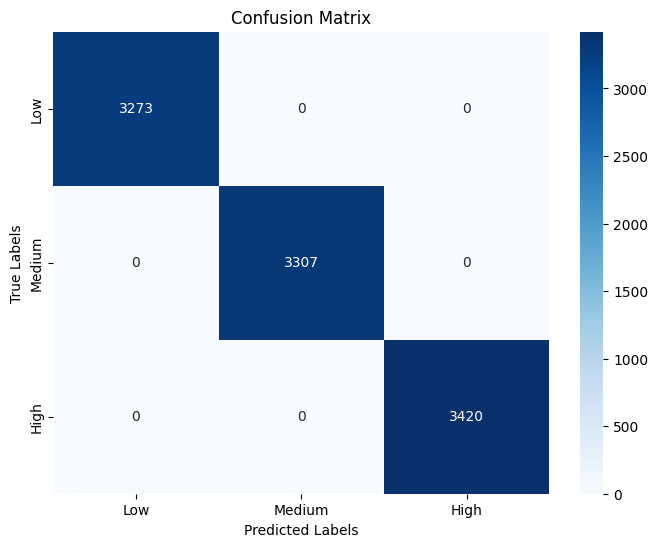

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/vehicle_energy_consumption_dataset (1).csv")

# Encode categorical target variable
data['Energy_Consumption'] = data['Energy_Consumption'].astype('category').cat.codes

# Split data into features and target
X = data.drop(columns=['Energy_Consumption'])
y = data['Energy_Consumption']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Data distribution across energy consumption classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Energy_Consumption', data=data)
plt.title("Data Distribution Across Energy Consumption Classes")
plt.xlabel("Energy Consumption Class")
plt.ylabel("Count")
plt.show()

# Plot 2: PCA for 2D visualization of decision boundaries (only for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.1, random_state=42)

# Train Random Forest on PCA-transformed data for visualization purposes
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = rf_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Energy_Consumption'], cmap='coolwarm', edgecolors='k', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'Medium', 'High'])
plt.title("Random Forest Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot 3: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Model Accuracy: 0.9851

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16528
           1       1.00      0.99      0.99     16561
           2       0.99      0.98      0.98     16911

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



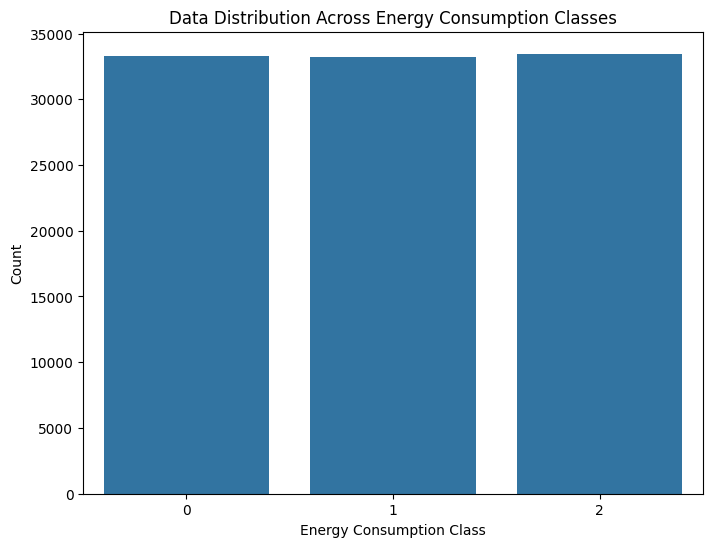

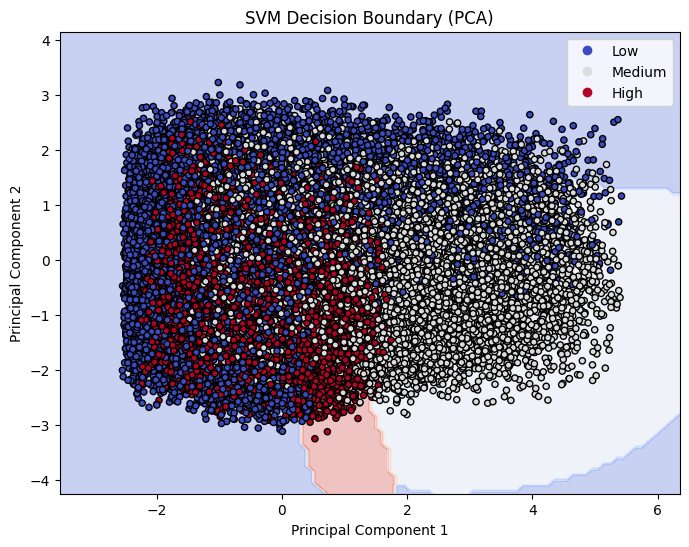

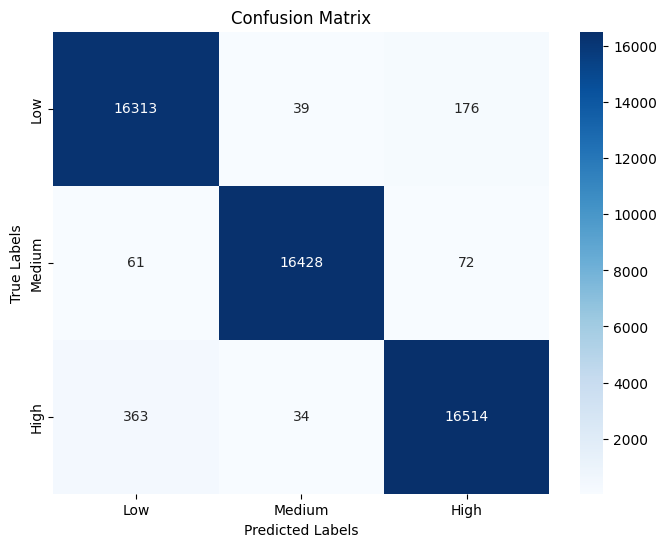

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/vehicle_energy_consumption_dataset (1).csv")

# Encode categorical target variable
data['Energy_Consumption'] = data['Energy_Consumption'].astype('category').cat.codes

# Split data into features and target
X = data.drop(columns=['Energy_Consumption'])
y = data['Energy_Consumption']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Data distribution across energy consumption classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Energy_Consumption', data=data)
plt.title("Data Distribution Across Energy Consumption Classes")
plt.xlabel("Energy Consumption Class")
plt.ylabel("Count")
plt.show()

# Plot 2: PCA for 2D visualization of decision boundaries (only for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.5, random_state=42)

# Train SVM on PCA-transformed data for visualization purposes
svm_model_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Energy_Consumption'], cmap='coolwarm', edgecolors='k', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'Medium', 'High'])
plt.title("SVM Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot 3: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Model Accuracy: 0.99996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16528
           1       1.00      1.00      1.00     16561
           2       1.00      1.00      1.00     16911

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



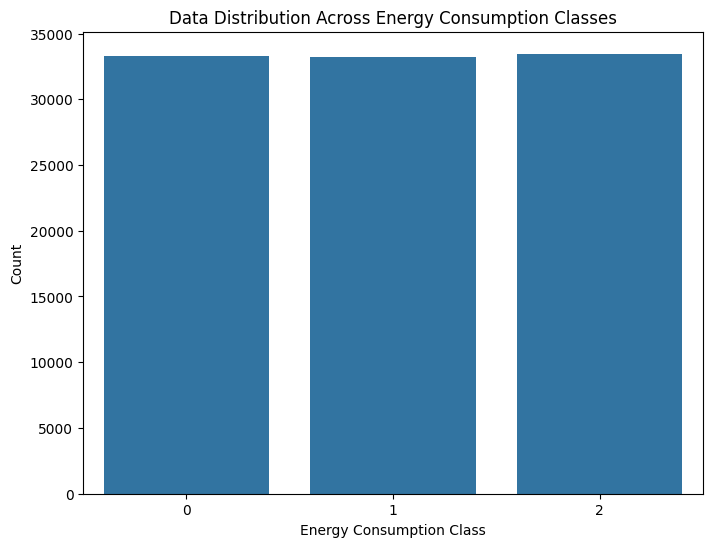

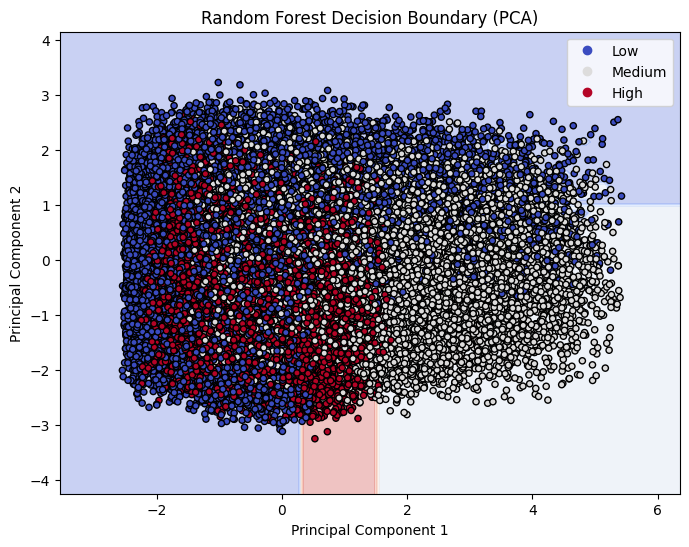

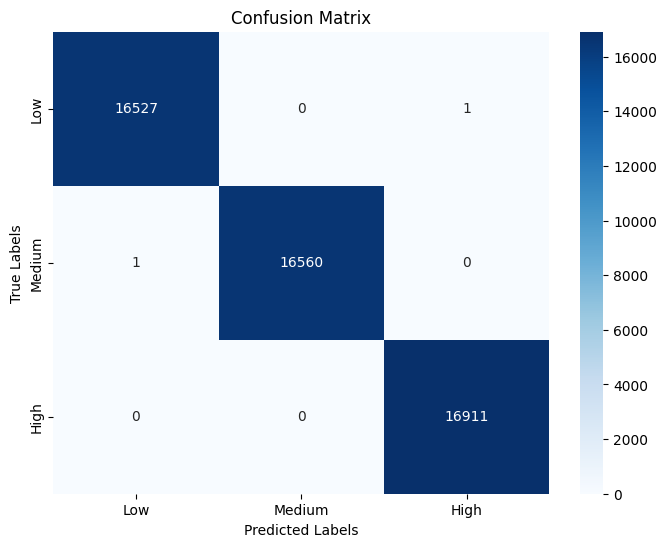

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/vehicle_energy_consumption_dataset (1).csv")

# Encode categorical target variable
data['Energy_Consumption'] = data['Energy_Consumption'].astype('category').cat.codes

# Split data into features and target
X = data.drop(columns=['Energy_Consumption'])
y = data['Energy_Consumption']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Data distribution across energy consumption classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Energy_Consumption', data=data)
plt.title("Data Distribution Across Energy Consumption Classes")
plt.xlabel("Energy Consumption Class")
plt.ylabel("Count")
plt.show()

# Plot 2: PCA for 2D visualization of decision boundaries (only for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.5, random_state=42)

# Train Random Forest on PCA-transformed data for visualization purposes
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = rf_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Energy_Consumption'], cmap='coolwarm', edgecolors='k', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'Medium', 'High'])
plt.title("Random Forest Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot 3: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Model Accuracy: 0.9734666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     30059
           1       0.99      0.98      0.99     29887
           2       0.97      0.96      0.97     30054

    accuracy                           0.97     90000
   macro avg       0.97      0.97      0.97     90000
weighted avg       0.97      0.97      0.97     90000



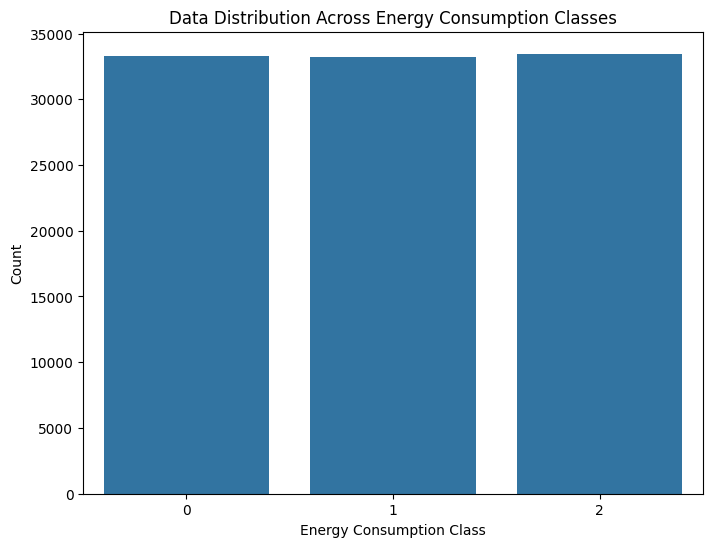

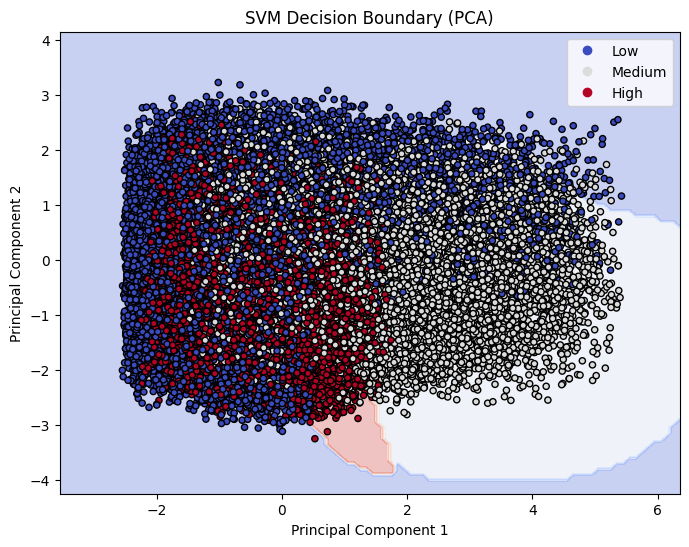

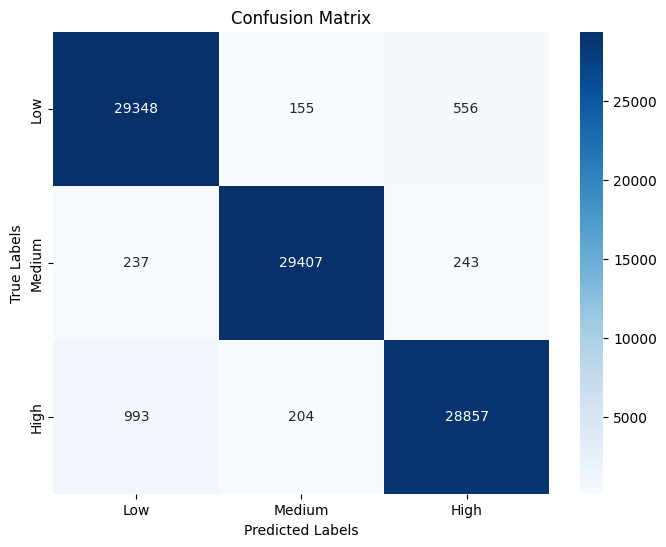

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/vehicle_energy_consumption_dataset (1).csv")

# Encode categorical target variable
data['Energy_Consumption'] = data['Energy_Consumption'].astype('category').cat.codes

# Split data into features and target
X = data.drop(columns=['Energy_Consumption'])
y = data['Energy_Consumption']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.9, random_state=42)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Data distribution across energy consumption classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Energy_Consumption', data=data)
plt.title("Data Distribution Across Energy Consumption Classes")
plt.xlabel("Energy Consumption Class")
plt.ylabel("Count")
plt.show()

# Plot 2: PCA for 2D visualization of decision boundaries (only for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.9, random_state=42)

# Train SVM on PCA-transformed data for visualization purposes
svm_model_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Energy_Consumption'], cmap='coolwarm', edgecolors='k', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'Medium', 'High'])
plt.title("SVM Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot 3: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Model Accuracy: 0.9998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30059
           1       1.00      1.00      1.00     29887
           2       1.00      1.00      1.00     30054

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



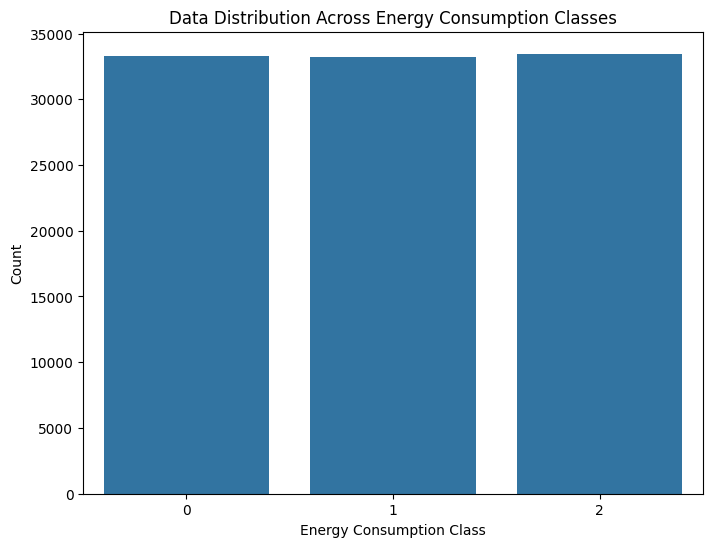

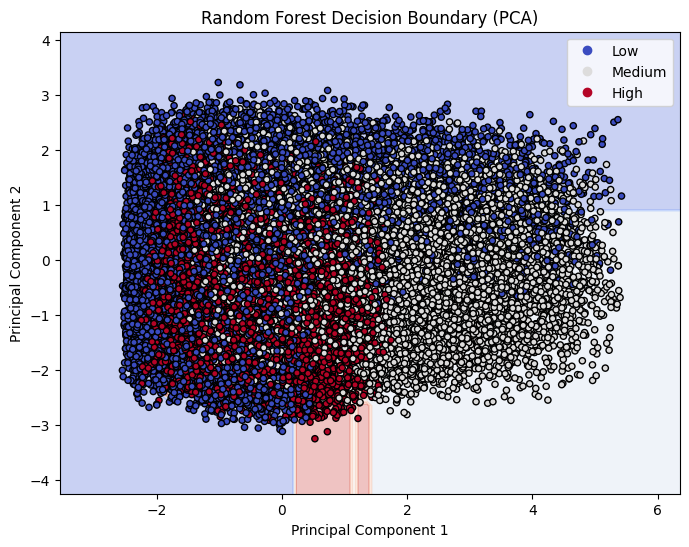

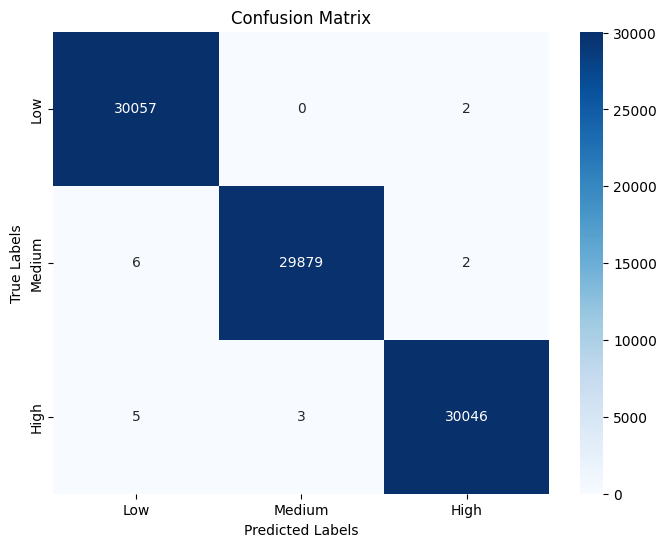

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/vehicle_energy_consumption_dataset (1).csv")

# Encode categorical target variable
data['Energy_Consumption'] = data['Energy_Consumption'].astype('category').cat.codes

# Split data into features and target
X = data.drop(columns=['Energy_Consumption'])
y = data['Energy_Consumption']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.9, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Data distribution across energy consumption classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Energy_Consumption', data=data)
plt.title("Data Distribution Across Energy Consumption Classes")
plt.xlabel("Energy Consumption Class")
plt.ylabel("Count")
plt.show()

# Plot 2: PCA for 2D visualization of decision boundaries (only for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.9, random_state=42)

# Train Random Forest on PCA-transformed data for visualization purposes
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = rf_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Energy_Consumption'], cmap='coolwarm', edgecolors='k', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'Medium', 'High'])
plt.title("Random Forest Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot 3: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
